In [2]:
from casino import SimCasino, CasinoAnnealer
import matplotlib.pyplot as plt
import numpy as np

Apartado a)
	Proporción días bancarrota:  0.11596666666666978
Apartado b)
	Distribución de fichas al final día:


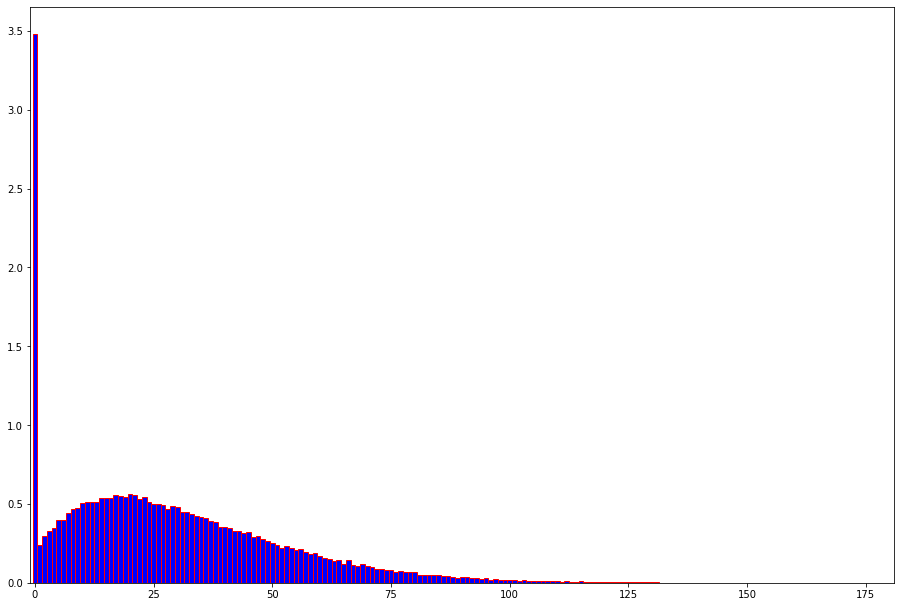

Apartado c)
	Partidas medias antes de bancarrota:  41.53803808418137


In [9]:
# Simular para los apartados a, b y c
# a) ¿qué proporción de noches a lo largo de un mes se ha retirado por quedarse sin dinero?
# b) ¿Cuál es el número de fichas con las que ha finalizado las noches de ese mes y cómo se distribuye (representar el histograma)? 
# c) ¿cuál  es  el  número  medio  de  partidas  jugadas  antes  de  retirarse  por quedarse sin dinero?
sim = SimCasino(max_partidas=50)
a, b, c = sim.simular(n_simulaciones=5000)
print(f'Apartado a)\n\tProporción días bancarrota:  {a}')
print(f'Apartado b)\n\tDistribución de fichas al final día:')
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(list(range(sim.max_fichas + 35)),b, width=1, color = 'b', edgecolor='r')
# ax.set_xticks([0] + list(filter(lambda z: z, [x if y > 0 else 0 for x, y in enumerate(b)])))
plt.xlim([min(np.where(b != 0)[0]) - 1, max(np.where(b != 0)[0]) + 1])
plt.show()
print(f'Apartado c)\n\tPartidas medias antes de bancarrota:  {c}')

In [10]:
import numpy as np
# Simular el apartado d
# Si  analizamos  el  problema  a  largo  plazo,  jugando  partidas
# indefinidamente,  y empezando con 30 fichas ¿cuál es la probabilidad de que
# me quede sin dinero? ¿y la de que termine con 150 fichas?
sim = SimCasino(n_dias=1, max_partidas=np.inf, max_fichas=250)
a, b, c = sim.simular(n_simulaciones=10000)
print(f'Probabilidad bancarrota:  {a}')
print(f'Probabilidad terminar con 150 fichas o más:  {1-a}')

Probabilidad bancarrota:  0.9336
Probabilidad terminar con 150 fichas o más:  0.06640000000000001


 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.09976        -35.71     0.00%     0.00%     0:01:27     0:00:00
Fin: 5 5 50

Mejores probabilidades: [0.1622040308204337, 0.16176683661923996, 0.1263666154335919, 0.1374584112364543, 0.1646298883135302, 0.14345793645291927, 0.16383675434259568]
Fichas medias: 35.71
Nº epochs 50


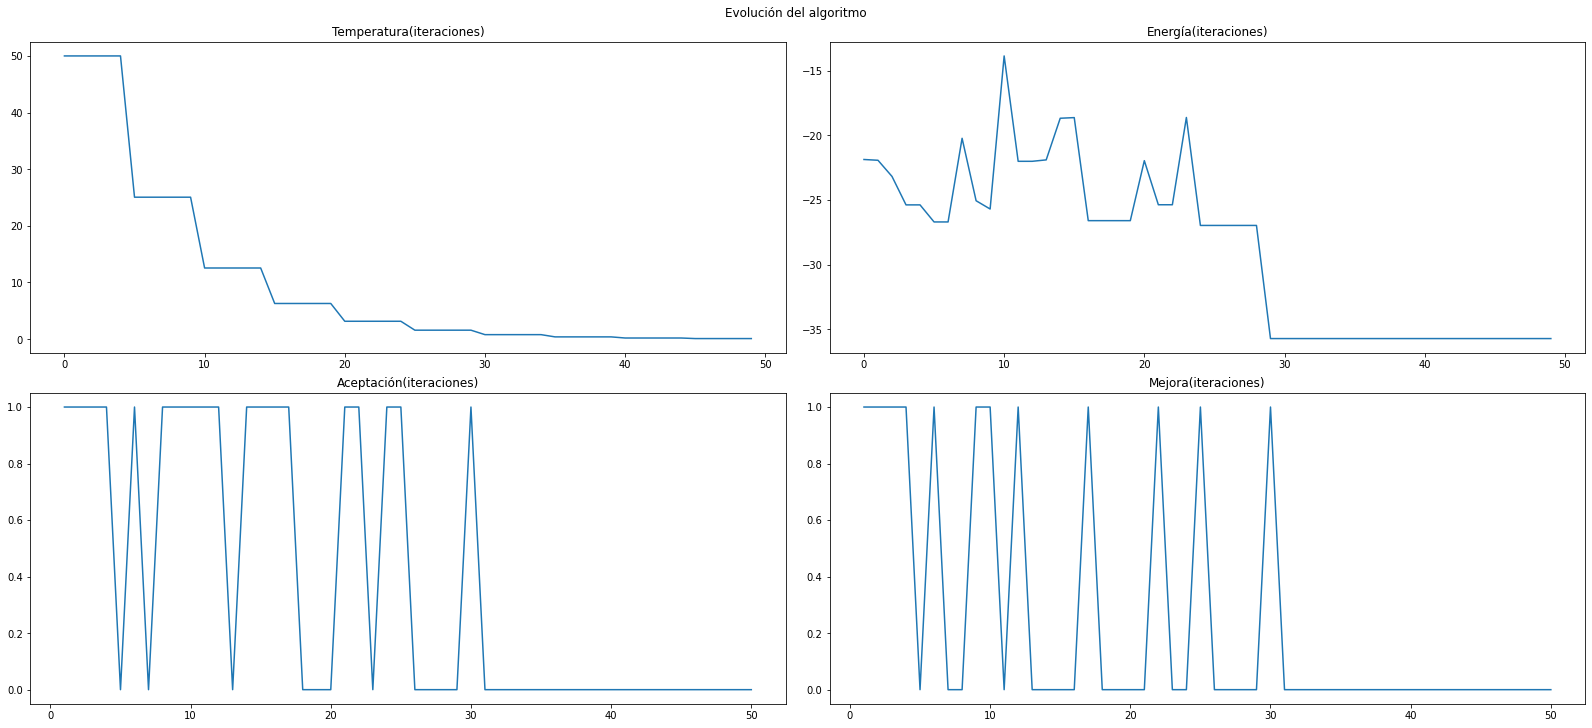

In [1]:
from casino import SimCasino, CasinoAnnealer

ann = CasinoAnnealer(n_simulaciones=100, T_config={'L': 5})
ann.Tmax = 50
ann.Tmin = 0.05
ann.steps = 50
best_sol, best_cost = ann.anneal()
print(f'Mejores probabilidades: {best_sol}')
print(f'Fichas medias: {-best_cost}')
print(f'Nº epochs {ann.epochs}')
ann.plot_evolution()